In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [10]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import os
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(10)


Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [12]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
print('train_data=', (X_train_image.shape))
print('test_data=', (X_test_image.shape))

train_data= (60000, 28, 28)
test_data= (10000, 28, 28)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

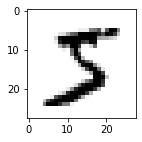

In [18]:
plot_image(X_train_image[0])

In [19]:
y_train_label[0]

5

In [0]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  flg = plt.gcf()
  flg.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[idx],cmap='binary')
    title="label="+str(labels[idx])
    if len(prediction)>0:
      title+=",predition="+str(prediction[idx])
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

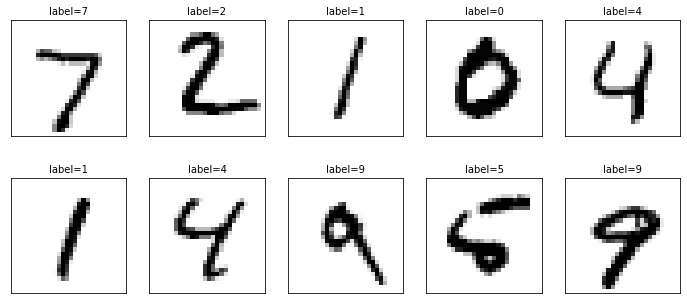

In [26]:
plot_images_labels_prediction(X_test_image,y_test_label,[],0,10)

In [0]:
x_Train = X_train_image.reshape(60000, 784).astype('float32')
x_Test = X_test_image.reshape(10000, 784).astype('float32')

In [28]:
x_Train.shape

(60000, 784)

In [29]:
x_Train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [0]:
x_Train_normalize = x_Train /255
x_Test_normalize = x_Test /255

In [31]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [35]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
from keras.layers import Dropout

In [0]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3643 - acc: 0.8865 - val_loss: 0.1297 - val_acc: 0.9620
Epoch 2/10
 - 2s - loss: 0.1577 - acc: 0.9520 - val_loss: 0.1000 - val_acc: 0.9692
Epoch 3/10
 - 1s - loss: 0.1195 - acc: 0.9626 - val_loss: 0.0882 - val_acc: 0.9737
Epoch 4/10
 - 1s - loss: 0.0989 - acc: 0.9690 - val_loss: 0.0821 - val_acc: 0.9762
Epoch 5/10
 - 1s - loss: 0.0832 - acc: 0.9735 - val_loss: 0.0753 - val_acc: 0.9781
Epoch 6/10
 - 1s - loss: 0.0765 - acc: 0.9762 - val_loss: 0.0787 - val_acc: 0.9767
Epoch 7/10
 - 1s - loss: 0.0682 - acc: 0.9782 - val_loss: 0.0749 - val_acc: 0.9787
Epoch 8/10
 - 1s - loss: 0.0623 - acc: 0.9795 - val_loss: 0.0712 - val_acc: 0.9796
Epoch 9/10
 - 1s - loss: 0.0564 - acc: 0.9822 - val_loss: 0.0741 - val_acc: 0.9792
Epoch 10/10
 - 1s - loss: 0.0496 - acc: 0.9830 - val_loss: 0.0691 - val_acc: 0.9812


In [0]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

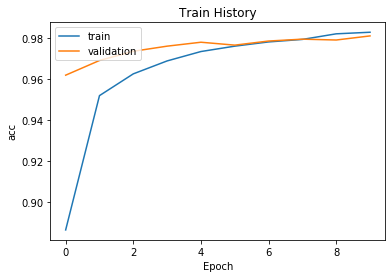

In [113]:
show_train_history(train_history,'acc','val_acc')

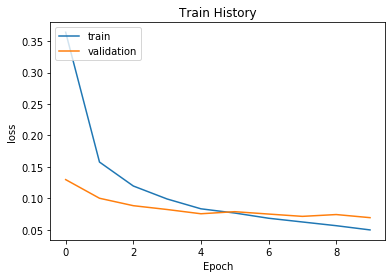

In [114]:
show_train_history(train_history,'loss','val_loss')

In [54]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print(scores)

10000/10000 [==============================] - 0s 40us/step

[0.07563982797577046, 0.9762]


In [0]:
prediction = model.predict_classes(x_Test_normalize)

In [61]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

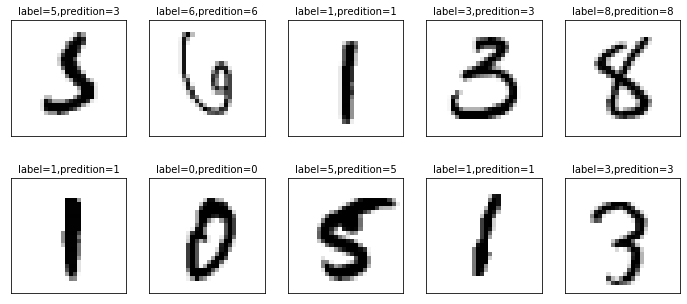

In [62]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx=340)

In [64]:
pd.crosstab(y_test_label,prediction,rownames=['labels'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,3,10,0
3,0,0,4,991,0,2,0,4,5,4
4,1,0,5,1,963,0,2,0,3,7
5,3,0,0,12,1,857,7,1,8,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,13,6,1,0,0,989,6,8
8,5,0,3,5,2,2,1,2,953,1


In [67]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [68]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
4271,5,3
4355,5,3
4360,5,3


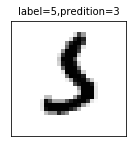

In [69]:
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=340,num=1)